In [1]:
import matplotlib as mp
import numpy as np
import matplotlib.pyplot as plt
import scipy.misc as sm
import numpy as np
import math as m
import pandas as pd
from numpy.linalg import lstsq
from scipy.optimize import curve_fit, leastsq
from astropy.io import fits
import sklearn
from sklearn.cluster import KMeans
from scipy.interpolate import griddata

from scipy.optimize import curve_fit, leastsq # for optimizing datas and plots 
from scipy.optimize import fsolve  # this is for solving equations 
from scipy.interpolate import interp1d



In [2]:
classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

NameError: name 'KNeighborsClassifier' is not defined

In [29]:
def plot_mat(data):
   
    v=range(0,3000)
    # The normal figure
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111)
    im = ax.matshow(data,cmap="Greys")

    for i in range(len(data)):
        for j in range(len(data)):
            text = ax.text(j, i, data[i, j],ha="center", va="center", color="b")
    im.set_clim(0,700.0)
    #fig.colorbar(im)
    plt.show()
    

In [3]:
X_train=np.load("input_train_maxnorm.npy")
y_train=np.loadtxt("y_train.dat")
y_test=np.loadtxt("y_test.dat")

In [4]:
X_test=np.load("input_test_maxnorm.npy")

In [5]:
X=np.array(list(X_train)+list(X_test))

ya=np.array(list(y_train)+list(y_test))


In [9]:
r=r.reshape(1, 120238)[0]

NameError: name 'r' is not defined

In [10]:
n, bins, patches = plt.hist(r, 1100, density=True, facecolor='g')

NameError: name 'r' is not defined

In [6]:
y=np.loadtxt("y_train.dat")

In [7]:
y=(ya/1000).astype(int)

In [8]:
y # classification for 1st class

array([1, 1, 1, ..., 4, 6, 4])

In [9]:
y2=(ya-(ya/1000).astype(int)*1000)

In [10]:
y_l=[]
y_r=[]
for i in range(0,len(ya)):
    x,y=int(str(ya[i])[:3]),float(str(ya[i])[3:])
    y_r.append(x)
    y_l.append(y)
y_r=np.array(y_r)
y_l=np.array(y_l)


In [11]:
y=y_l.astype(int)# my output in luminosity

In [12]:
np.unique(y)

array([1, 3, 5, 7, 9])

## Simple SGDClassifier for Multiclass

In [19]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2, random_state=42)

#X_train, X_test, y_train, y_test= X[:158],X[158:],y[:158],y[158:]


sgd_clf = SGDClassifier(random_state=42)


In [20]:
sgd_clf.fit(X_train, y_train)
y_train_pred=sgd_clf.predict(X_train)
y_test_pred=sgd_clf.predict(X_test)

In [21]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")


array([0.61623616, 0.64552239, 0.67041199])

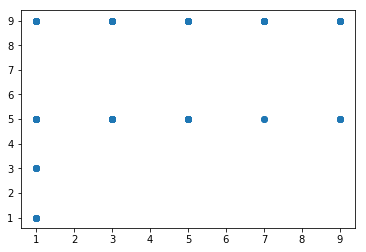

In [22]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, y_train_pred)
plt.scatter(y_train, y_train_pred)

In [23]:
confusion_matrix(y_test, y_test_pred)

array([[ 1,  0,  3,  0,  4],
       [ 0,  0,  1,  0,  1],
       [ 0,  0, 40,  0, 37],
       [ 0,  0,  1,  0, 23],
       [ 0,  0,  0,  0, 91]])

## Random Forest Classifier

In [24]:
from sklearn.ensemble import RandomForestClassifier

In [25]:
clf_rf=RandomForestClassifier()

In [26]:
clf_rf.fit(X_train,y_train)


/home/shrish/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

0.2634015783566372

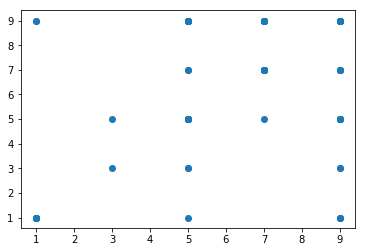

In [27]:
y_train_pred=clf_rf.predict(X_train)
y_test_pred=clf_rf.predict(X_test)
y_pred=clf_rf.predict(X)
plt.scatter(y_test,y_test_pred)
np.std(y_train-y_train_pred)

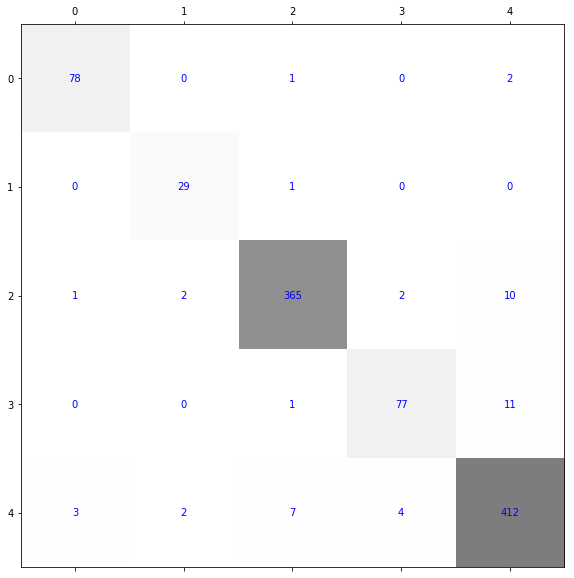

In [30]:
plot_mat(confusion_matrix(y, y_pred))

In [29]:
confusion_matrix(y_test, y_test_pred)

array([[ 6,  0,  0,  0,  2],
       [ 0,  0,  1,  1,  0],
       [ 5,  1, 60,  3,  8],
       [ 0,  0,  2, 13,  9],
       [ 0,  1, 12,  3, 75]])

In [30]:

cross_val_score(clf_rf, X_train, y_train, cv=3, scoring="accuracy")


array([0.75276753, 0.79850746, 0.8164794 ])

##  KNeighborsClassifier

In [31]:
from sklearn.neighbors import KNeighborsClassifier

In [32]:
clf_knn=KNeighborsClassifier()
clf_knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

1.4811900560175693

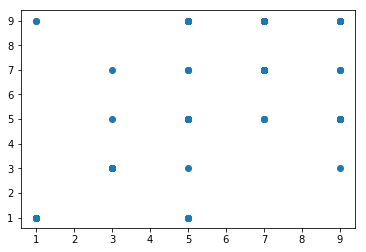

In [33]:
y_train_pred=clf_knn.predict(X_train)
y_test_pred=clf_knn.predict(X_test)
plt.scatter(y,y_pred)
np.std(y_train-y_train_pred)

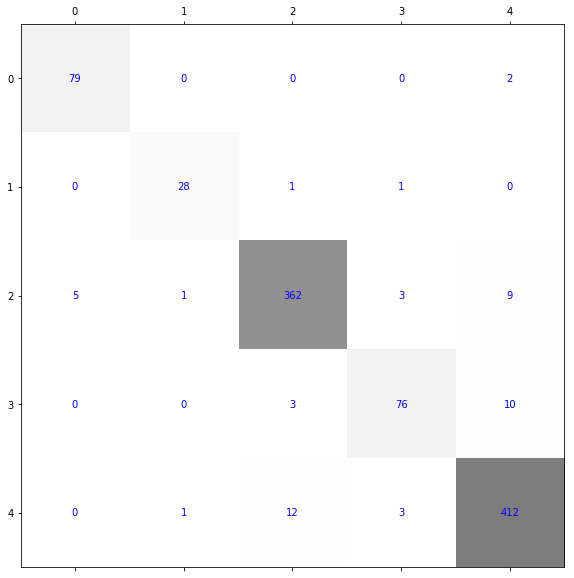

In [34]:
plot_mat(confusion_matrix(y, y_pred))

In [36]:
confusion_matrix(y_test, y_test_pred)

array([[ 6,  1,  0,  0,  1],
       [ 0,  0,  1,  1,  0],
       [ 2,  0, 66,  5,  4],
       [ 0,  0,  1, 12, 11],
       [ 1,  0, 10,  2, 78]])

In [ ]:
cross_val_score(clf_knn, X_train, y_train, cv=3, scoring="accuracy")

## DecisionTreeClassifier

In [37]:
from sklearn.tree import DecisionTreeClassifier

In [38]:
clf_dtc=DecisionTreeClassifier()
clf_dtc.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [39]:
y_train_pred=clf_dtc.predict(X_train)
y_test_pred=clf_dtc.predict(X_test)

In [40]:
confusion_matrix(y_train, y_train_pred)

array([[ 73,   0,   0,   0,   0],
       [  0,  28,   0,   0,   0],
       [  0,   0, 303,   0,   0],
       [  0,   0,   0,  65,   0],
       [  0,   0,   0,   0, 337]])

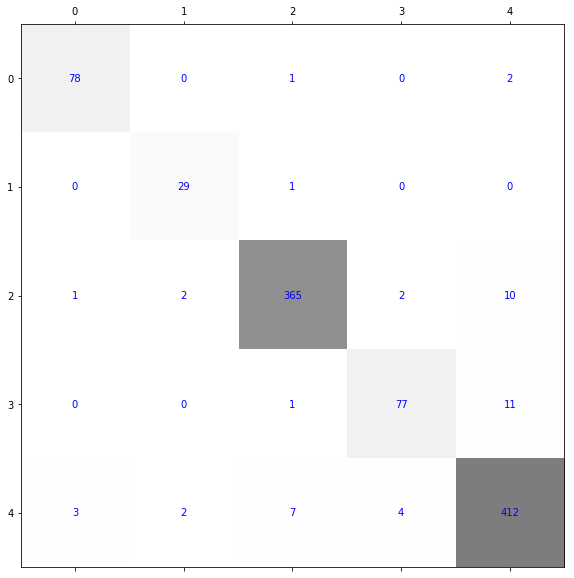

In [32]:
plot_mat(confusion_matrix(y, y_pred))
plt.savefig('cmat.eps')

## ANN

In [42]:
from sklearn.neural_network import MLPClassifier

In [43]:
clf_ann=MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(64, 64), random_state=1, max_iter=1000)
clf_ann.fit(X_train,y_train)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(64, 64), learning_rate='constant',
              learning_rate_init=0.001, max_iter=1000, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=1, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

1.4281127164167047

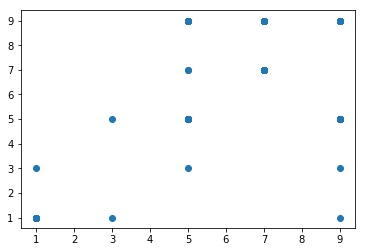

In [44]:
y_train_pred=clf_ann.predict(X_train)
y_test_pred=clf_ann.predict(X_test)

#clf_ann.predict_proba(X_test)
plt.scatter(y_test,y_test_pred)
np.std(y_test-y_test_pred)

In [45]:
confusion_matrix(y_train, y_train_pred)

array([[ 73,   0,   0,   0,   0],
       [  1,  23,   4,   0,   0],
       [  0,   2, 300,   1,   0],
       [  0,   0,   0,  53,  12],
       [  0,   0,   2,   3, 332]])

In [46]:
confusion_matrix(y_test, y_test_pred)

array([[ 7,  1,  0,  0,  0],
       [ 1,  0,  1,  0,  0],
       [ 0,  1, 67,  2,  7],
       [ 0,  0,  0, 16,  8],
       [ 1,  1,  9,  0, 80]])

In [47]:
from sklearn.metrics import f1_score
f1_score(y_test, y_test_pred, average="macro")

0.6631558195125558

## Using lebel binarizer

In [48]:
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()
y_b_train = encoder.fit_transform(y_train)
y_b_test = encoder.fit_transform(y_test)
y_b_train

array([[0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0],
       [1, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 1, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0]])

In [49]:
#encoder.inverse_transform(y_b_test)
clb_ann=MLPClassifier()
clb_ann.fit(X_train,y_b_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [50]:
clf_rf_b=RandomForestClassifier()
clf_rf_b.fit(X_train,y_b_train)

/home/shrish/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [51]:
y_train_pred=clf_rf_b.predict(X_train)
y_test_pred=clf_rf_b.predict(X_test)
y_tr_p=encoder.inverse_transform(y_train_pred)
y_te_p=encoder.inverse_transform(y_test_pred)



y_train_preda=clb_ann.predict(X_train)
y_test_preda=clb_ann.predict(X_test)
y_tr_pa=encoder.inverse_transform(y_train_preda)
y_te_pa=encoder.inverse_transform(y_test_preda)

In [52]:
confusion_matrix(y_train, y_tr_p)

array([[ 73,   0,   0,   0,   0],
       [  3,  25,   0,   0,   0],
       [  6,   0, 296,   0,   1],
       [  5,   0,   0,  59,   1],
       [  7,   0,   0,   0, 330]])

In [53]:
confusion_matrix(y_train, y_tr_pa)

array([[ 33,   0,  26,   0,  14],
       [  5,   0,  19,   0,   4],
       [ 23,   0, 244,   0,  36],
       [  8,   0,  15,   0,  42],
       [ 47,   0,  40,   0, 250]])

In [54]:
confusion_matrix(y_test, y_te_p)

array([[ 7,  0,  0,  0,  1],
       [ 1,  0,  1,  0,  0],
       [14,  0, 57,  2,  4],
       [ 7,  0,  0, 10,  7],
       [16,  0,  5,  0, 70]])

In [55]:
confusion_matrix(y_test, y_te_pa)

array([[ 2,  0,  3,  0,  3],
       [ 0,  0,  1,  0,  1],
       [ 9,  0, 56,  0, 12],
       [ 2,  0,  8,  0, 14],
       [13,  0, 14,  0, 64]])

## SVM

In [56]:
from sklearn.svm import SVC

In [57]:
clf_svc=SVC(gamma=5, C=3)
clf_svc.fit(X_train,y_train)

SVC(C=3, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=5, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [58]:
y_train_pred=clf_svc.predict(X_train)
y_test_pred=clf_svc.predict(X_test)

In [59]:
confusion_matrix(y_train, y_train_pred)

array([[ 73,   0,   0,   0,   0],
       [  0,  26,   2,   0,   0],
       [  0,   0, 302,   0,   1],
       [  0,   0,   1,  58,   6],
       [  0,   0,   0,   1, 336]])

In [60]:
confusion_matrix(y_test, y_test_pred)

array([[ 4,  0,  0,  0,  4],
       [ 0,  0,  0,  0,  2],
       [ 0,  0, 60,  2, 15],
       [ 0,  0,  1, 12, 11],
       [ 0,  0,  4,  0, 87]])

## Gaussian NB

In [61]:
from sklearn.naive_bayes import GaussianNB

In [62]:
clf_nb=GaussianNB()
clf_nb.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [63]:
y_train_pred=clf_nb.predict(X_train)
y_test_pred=clf_nb.predict(X_test)

In [64]:
confusion_matrix(y_test, y_test_pred)

array([[ 2,  1,  2,  1,  2],
       [ 0,  1,  0,  1,  0],
       [13,  3, 53,  5,  3],
       [ 7,  0,  8,  6,  3],
       [26,  2, 18, 16, 29]])

In [65]:
data=confusion_matrix(y_train, y_train_pred)

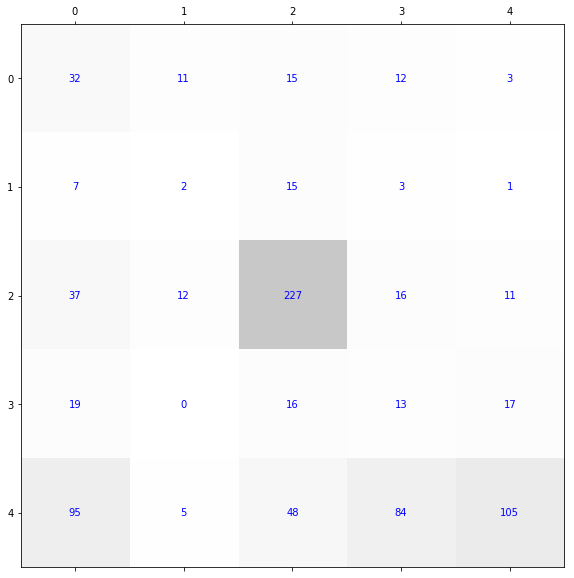

In [66]:
plot_mat(confusion_matrix(y_train, y_train_pred))

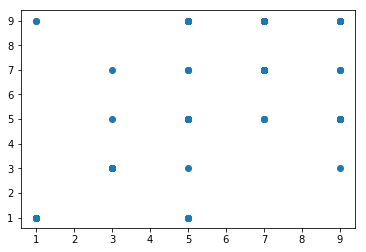

In [67]:
plt.scatter(y,y_pred)

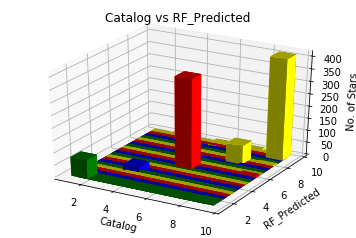

In [31]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

#res = np.loadtxt("result_test", unpack=True)
#print(res[0], res[1])

#hist, xedges, yedges = np.histogram2d(res[0], res[1], bins=36)
hist, xedges, yedges = np.histogram2d(y, y_pred, bins=20)

# Construct arrays for the anchor positions of the 36 bars.
# Note: np.meshgrid gives arrays in (ny, nx) so we use 'F' to flatten xpos,
# ypos in column-major order. For numpy >= 1.7, we could instead call meshgrid
# with indexing='ij'.
xpos, ypos = np.meshgrid(xedges[:-1] + 0.0025, yedges[:-1] + 0.0025)
xpos = xpos.flatten('F')
ypos = ypos.flatten('F')
zpos = np.zeros_like(xpos)

# Construct arrays with the dimensions for the 16 bars.
dx = np.ones_like(zpos)
dy = dx.copy()
dz = hist.flatten()

#color = ['green', 'blue', 'red', 'yellow'] * 324
color = ['green', 'blue', 'red', 'yellow'] * 100

ax.bar3d(xpos, ypos, zpos, dx, dy, dz, color=color, zsort='average')

ax.set_xlabel('Catalog')
ax.set_ylabel('RF_Predicted')
ax.set_zlabel('No. of Stars')
ax.set_title('Catalog vs RF_Predicted')
plt.savefig('3d.eps')
plt.show()

In [99]:
hist, xedges, yedges = np.histogram2d(y, y_pred, bins=6)